In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
PROJ_DIR = '../../victim/simpleserial-dilithium'
FIRMWAREPATH = '/home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware'
NSHARES = 1
N = 1000

In [2]:
import sys
sys.path.append('../../../scaredcu')

In [3]:
import scaredcu
import os
import cupy as cp
import numpy as np
from tqdm.auto import tqdm
import estraces
from matplotlib import pyplot as plt
%matplotlib widget


In [4]:
%%bash -s "$PROJ_DIR" "$FIRMWAREPATH" "$PLATFORM" "$NSHARES"
cd $1
make FIRMWAREPATH=$2 PLATFORM=$3 NSHARES=$4

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (15:12.2.rel1-1) 12.2.1 20221205
Copyright (C) 2022 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
-en     simpleserial-dilithium.c ...
-e Done!
.
Compiling:
-en     src/sign.c ...


src/sign.c: In function 'crypto_sign_keypair_derand':
src/sign.c:24:35: warning: variable 'key' set but not used [-Wunused-but-set-variable]
   24 |   const uint8_t *rho, *rhoprime, *key;
      |                                   ^~~
src/sign.c:24:18: warning: variable 'rho' set but not used [-Wunused-but-set-variable]
   24 |   const uint8_t *rho, *rhoprime, *key;
      |                  ^~~


-e Done!
.
Compiling:
-en     src/masked_sign.c ...
-e Done!
.
Compiling:
-en     src/masking_interface.c ...
-e Done!
.
Compiling:
-en     src/ntt.c ...
-e Done!
.
Compiling:
-en     src/poly.c ...
-e Done!
.
Compiling:
-en     src/polyvec.c ...


In file included from src/params.h:4,
                 from src/polyvec.c:2:
src/polyvec.c: In function 'pqcrystals_dilithium3_ref_polyvecl_uniform_gamma1':
src/config.h:9:32: warning: 'pqcrystals_dilithium3_ref_poly_uniform_gamma1' reading 48 bytes from a region of size 32 [-Wstringop-overread]
    9 | #define DILITHIUM_NAMESPACE(s) pqcrystals_dilithium3_ref##s
src/poly.h:54:29: note: in expansion of macro 'DILITHIUM_NAMESPACE'
   54 | #define poly_uniform_gamma1 DILITHIUM_NAMESPACE(_poly_uniform_gamma1)
      |                             ^~~~~~~~~~~~~~~~~~~
src/polyvec.c:47:5: note: in expansion of macro 'poly_uniform_gamma1'
   47 |     poly_uniform_gamma1(&v->vec[i], seed, L*nonce + i);
      |     ^~~~~~~~~~~~~~~~~~~
src/config.h:9:32: note: referencing argument 2 of type 'const uint8_t[48]' {aka 'const unsigned char[48]'}
    9 | #define DILITHIUM_NAMESPACE(s) pqcrystals_dilithium3_ref##s
src/poly.h:54:29: note: in expansion of macro 'DILITHIUM_NAMESPACE'
   54 | #define poly_un

-e Done!
.
Compiling:
-en     src/masked_polyvec_operations.c ...
-e Done!
.
Compiling:
-en     src/reduce.c ...
-e Done!
.
Compiling:
-en     src/fips202.c ...
-e Done!
.
Compiling:
-en     src/symmetric-shake.c ...
-e Done!
.
Compiling:
-en     ../common/randombytes.c ...


../common/randombytes.c:38:2: warning: #warning Using a non-random randombytes [-Wcpp]
   38 | #warning Using a non-random randombytes
      |  ^~~~~~~


-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/simpleserial/simpleserial.c ...
-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/hal/stm32f3/stm32f3_hal.c ...
-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/hal/stm32f3/stm32f3_hal_lowlevel.c ...
-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/hal/stm32f3/stm32f3_sysmem.c ...
-e Done!
.
Assembling: /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/hal/stm32f3/stm32f3_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mcpu=cortex-m4 -mfloat-abi=hard -mfpu=fpv4-sp-d16 -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CWLITEARM/stm32f3_startup.lst -Isrc -I../common -I/home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/simpleserial/ -I/home/toluntosu

In [5]:
import chipwhisperer as cw
try:
    if not scope.connectStatus:
        scope.con()
except NameError:
    scope = cw.scope()

try:
    target = cw.target(scope)
except IOError:
    print("INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.")
    print("INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.")
    scope = cw.scope()
    target = cw.target(scope)

scope.default_setup()

scope.adc.samples = 25000*NSHARES

print("INFO: Found ChipWhisperer😍")

/home/toluntosun/Desktop/CW/chipwhisperer/software/chipwhisperer/capture/trace/TraceWhisperer.py:31: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources # type: ignore
(ChipWhisperer NAEUSB WARNING|File naeusb.py:800) Your firmware (1.0) is outdated - latest is 1.62 See https://chipwhisperer.readthedocs.io/en/latest/firmware.html for more information


scope.gain.mode                          changed from low                       to high                     
scope.gain.gain                          changed from 0                         to 30                       
scope.gain.db                            changed from 5.5                       to 24.8359375               
scope.adc.basic_mode                     changed from low                       to rising_edge              
scope.adc.samples                        changed from 98134                     to 5000                     
scope.adc.trig_count                     changed from 17076276                  to 45929381                 
scope.clock.adc_src                      changed from clkgen_x1                 to clkgen_x4                
scope.clock.adc_freq                     changed from 96000000                  to 168721252                
scope.clock.adc_rate                     changed from 96000000.0                to 168721252.0              
scope.clock.clkgen_

In [6]:
fw_path = f'{PROJ_DIR}/simpleserial-dilithium-{PLATFORM}.hex'
prog = cw.programmers.STM32FProgrammer
cw.program_target(scope, prog, fw_path)

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 12383 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 12383 bytes


In [7]:
def coins_gen_s(coins):
    target.simpleserial_write('k',coins)
    sk_ = []
    
    for _ in range(8):
        sk_.append(target.read(258))
    print(sk_)
    sk_ = bytes.fromhex(sk_[0][1:257] + sk_[1][1:257] + sk_[2][1:257] + sk_[3][1:257] + sk_[4][1:257] + sk_[5][1:257] + sk_[6][1:257] + sk_[7][1:257])
    return np.frombuffer(sk_, dtype=np.int32)

In [8]:
dilithium_ntt = scaredcu.lbc.dilithium.NTT()

def coins_to_c(coins):
    c = scaredcu.lbc.dilithium.dilithium3_sample_in_ball(coins)
    return dilithium_ntt.ntt(c).get()


In [9]:
coins = os.urandom(32)
print(coins)

s = coins_gen_s(coins)
print(s)

s_ntt = dilithium_ntt.ntt_inv(cp.array(s))

reduction = scaredcu.lbc.modop.Reduction_Q2Q2(q=dilithium_ntt.q, o_dtype=dilithium_ntt.dtype)
print(reduction.reduce(s_ntt))

b'\x90\xe7\x07\x9a\x82\x94\xcb\xae\xd0\xdc\n%\xe0M+\xb2\xf2=\x88c\xe6\x890\xcc\xa0cQ\x98\xc3\xc1U\x8f'
['rB9EDA1FFCF99D7FFC9CE51FF971AB3FFD28164FF54D959FF16FCCAFFF40E65FF5ED8200028F2D6FF00928BFFAA16DAFF3A6E70FF6CD2A7FF585FB8FFEAA8F4FF31BD37FF67386DFF104591FFE8504BFFB39BA3FFD102C2FF402CC6FF54C069FF3BCD90FF77D845FFFEFFEFFF0837B3FFC0C594FF66A70200EFF5CBFF7BA69AFF\n', 'r994389FF0357EBFF7F6588FFC98768FF585E4600C68CDCFF83EEE4FF53D47BFF40D205009C7A94FF252F81FF9FA16BFF3BF286FF75B14DFF985B30FFD0F401FF080BF6FFF29CF9FF3D66CBFF2D8236009DCBC9FF1B0E3600AC9AC9FFB09EF0FF0B6CE2FF4DCE060034F4F5FF206BE6FF88BB0800866B91FF9C12E0FFC2575E00\n', 'r6BF3AFFFB13A83FF3D581700670FC2FF39142E00D1DA5200B42F6600D2212300D18A130057EE00001C5206000891B8FFC8EF4900DEAC70009DC8320001E3590087B1D6FF297F66FF2EE2D6FFFA17320063748000E53B6D00BF21E7FF11BD5100479099FF0BF71200BDF18EFF990ECFFF2F89FDFF5B3500005D7E78FFC1A4E0FF\n', 'r6F4CBA0039378D0045D7CD00D388B1005F4F3D00E93FB900DBA5C8003D26C000E45D6900785A110067CD4D00F9160D004C691A003

In [10]:
target.simpleserial_write('q', bytes())
target.simpleserial_wait_ack()

0

In [11]:
#Capture Traces

for i in range(1000):
    filename = f'traces/dilithium_basemult_d{NSHARES}_t{i}.ets'
    if os.path.isfile(filename):
        continue
    es_writer = estraces.ETSWriter(filename=filename, overwrite=False)
    break

target.output_len = 0


for i in tqdm(range(N)):
    coins = os.urandom(32)
    trace = cw.capture_trace(scope, target, cw.bytearray(coins))
    if trace is None:
        continue
    es_writer.write_samples(trace.wave)
    es_writer.write_metadata('c', coins_to_c(coins))
    es_writer.write_metadata('s', s)
    
es_writer.close()

  0%|          | 0/1000 [00:00<?, ?it/s]

ERROR:estraces.formats.ets_writer:Exception raised during init of h5f file: [Errno 2] Unable to synchronously open file (unable to open file: name = 'traces/dilithium_basemult_d1_t2.ets', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0).


In [12]:
import estraces

ths = estraces.read_ths_from_ets_file(filename)

print(ths)

Trace Header Set:
Name.............: ETS Format THS
Reader...........: ETS format reader of file traces/dilithium_basemult_d1_t2.ets with 1000 traces.
c................: int32
s................: int32



/home/toluntosun/miniconda3/envs/sca/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


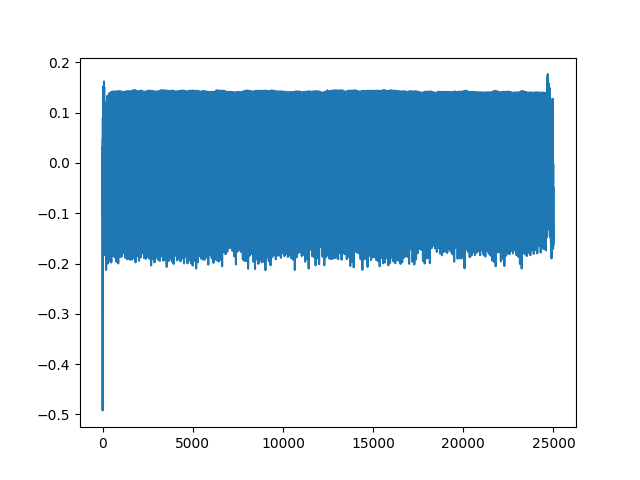

In [13]:
fig, ax = plt.subplots()

mean = ths.samples.mean(axis=0)

ax.plot(mean)